<a href="https://colab.research.google.com/github/JDonahue44/Food_Sales_Predictions/blob/main/Final_Project_Regression_Tree_Final_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
filename = '/content/sales_predictions.csv'

In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import set_config
set_config(display='diagram')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(filename)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'LF')
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          428
reg         117
Name: Item_Fat_Content, dtype: int64

In [7]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [8]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [9]:
df.drop('Item_Identifier', axis=1, inplace=True)

In [10]:
df.drop('Outlet_Identifier', axis=1, inplace=True)

In [11]:
target = 'Item_Outlet_Sales'
X = df.drop(columns = target)
y = df[target]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [13]:
X_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [14]:
R_dict = {'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}
X_train['Item_Fat_Content'] = X_train['Item_Fat_Content'].replace(R_dict)
X_test['Item_Fat_Content'] = X_test['Item_Fat_Content'].replace(R_dict)

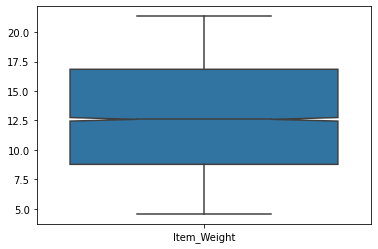

In [82]:
sns.boxplot(data = df.loc[:, ['Item_Weight']], notch = True)

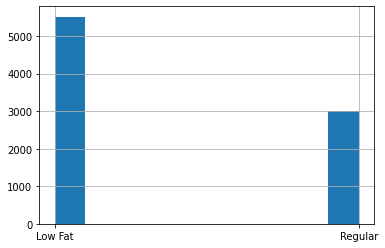

In [83]:
df['Item_Fat_Content'].hist()
plt.ticklabel_format(style='plain', axis='y')

In [15]:
cat_selector = make_column_selector(dtype_include='object')

cat_cols = cat_selector(X_train)
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [16]:
num_selector = make_column_selector(dtype_include='number')

num_cols = num_selector(X_train)
num_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [17]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [18]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [19]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [20]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [21]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

In [22]:
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f70c1574710>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f70c15959d0>)])

In [23]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f70c1574710>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f70c15959d0>)])

In [24]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [44]:
column_transformer = make_column_transformer(number_tuple, category_tuple, remainder='passthrough')

In [67]:
bagreg = BaggingRegressor(random_state = 42)

In [68]:
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [71]:
bagreg_pipe = make_pipeline(column_transformer, bagreg)

In [72]:
bagreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f70c1574710>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f70c15959d0>)])),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [73]:
bagreg_pipe.predict(X_test)

array([ 794.89862,  957.15408,  664.66814, ..., 3542.85496, 2615.99478,
       1875.15912])

In [74]:
bagreg_pipe_train_score = bagreg_pipe.score(X_train, y_train)
bagreg_pipe_test_score = bagreg_pipe.score(X_test, y_test)
print(bagreg_pipe_train_score)
print(bagreg_pipe_test_score)

0.9177812293662347
0.5289112812837558


In [76]:
rf = RandomForestRegressor(random_state = 42)

In [77]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [78]:
rf_pipe = make_pipeline(column_transformer, rf)

In [79]:
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f70c1574710>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f70c15959d0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [80]:
predictions = rf_pipe.predict(X_test)

In [81]:
train_score = rf_pipe.score(X_train, y_train)
test_score = rf_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.9374506717062747
0.5498905688189557


In [25]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [26]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [27]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [28]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.18054607210496232


In [29]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [30]:
dec_tree.get_depth()

40

In [31]:
dec_tree.get_n_leaves()

6265

In [32]:
max_depth_range = list(range(2, 50))
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

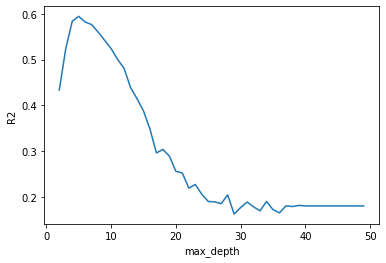

In [33]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [34]:
dec_tree_6 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_6.fit(X_train_processed, y_train)
train_6_score = dec_tree_6.score(X_train_processed, y_train)
test_6_score = dec_tree_6.score(X_test_processed, y_test)
print(train_6_score)
print(test_6_score)

0.6150717341872132
0.5823564733012907


In [35]:
def evaluate_regression(y_true, y_pred):
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

In [36]:
train_MAE = np.mean(np.abs(train_preds - y_train))
test_MAE = np.mean(np.abs(test_preds - y_test))

print(f'Model Training MAE:{train_MAE}')
print(f'Model Testing MAE:{test_MAE}')

Model Training MAE:1.0671480386885109e-16
Model Testing MAE:1044.6951886438292


In [37]:
train_MSE = np.mean(np.abs(train_preds - y_train)**2)
test_MSE = np.mean(np.abs(test_preds - y_test)**2)

print(f'Model Training MSE:{train_MSE}')
print(f'Model Testing MSE:{test_MSE}')

Model Training MSE:2.4264137179864312e-29
Model Testing MSE:2260854.775466361


In [38]:
train_RMSE = np.sqrt(np.mean(np.abs(train_preds - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_preds - y_test)**2))

print(f'Model Training RMSE:{train_RMSE}')
print(f'Model Testing RMSE:{test_RMSE}')

Model Training RMSE:4.925864104892086e-15
Model Testing RMSE:1503.6139050522115


In [39]:
train_r2 = np.corrcoef(y_train, train_preds)[0][1]**2
test_r2 = np.corrcoef(y_test, test_preds)[0][1]**2

print(f'Model Training R2:{train_r2}')
print(f'Model Testing R2:{test_r2}')

Model Training R2:0.9999999999999998
Model Testing R2:0.36826135777770624


Going through both of my models, I believe the better choice to represent my data would be my Random Forest Regressor Model. I was able to work through each of my model and use Regression Metrics to analyze how well those models ran. When I ran my model I was able to get a training score of 93% & a testing score of 55% round ing up. I've decided to use the Random Forest Regressor Model as my main model moving forward! The amount of variance in the Testing model may be high, but that also aligns with high integers we are dealing with to predict sales. Although there will be a high variance with our data, we will be able to tell the tragectory of our predicted sales.